DETECTING THE NUMBER OF PIPES IN A IMAGE 

Importing All the Required Libraries

In [224]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

Reading the image using Open CV library and checking the dimension 

height:421,width:699,depth:3


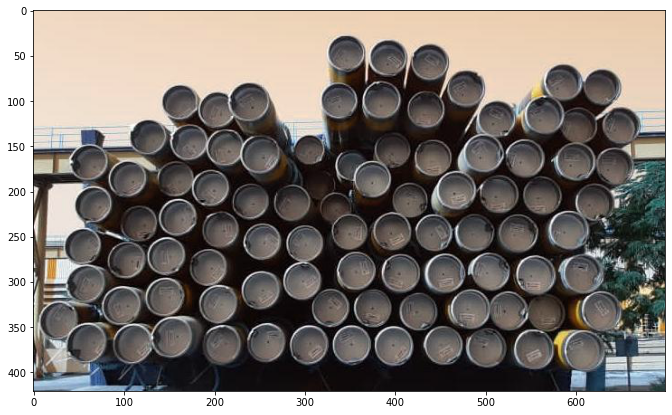

In [225]:
image= cv2.imread('Task_3_Pipe_Counting.jpeg')
plt.figure(figsize=(20,7))
plt.imshow(image)
(h,w,d)=image.shape
print('height:{},width:{},depth:{}'.format(h,w,d))

Converting the image to a Gray Scale image.Using bilateral filters detcting edges .Unlike Gaussian function which blurs the edges completely with the help of neighbour pixels to get thw weighted average according to the pixel intensity.The bilateralFilter() has a Gaussian function that preserves the edge by reducing the noise from the image  

In [226]:
img_org=image.copy()

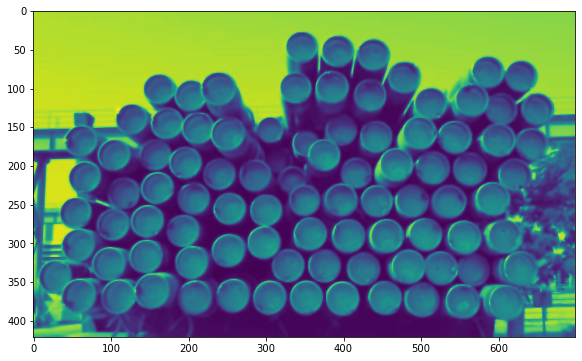

In [227]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img = cv2.bilateralFilter(gray,7,80,78)
plt.figure(figsize=(15,6))
plt.imshow(img)

Detecting the objects in the image and counting the number of pipes detected 

In [228]:
rows = gray.shape[0]
circles=cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.1,rows/40,param1=54,param2=30,minRadius=5,maxRadius=24)


In [229]:
counter=0
if circles is not None:
        circles = np.uint16(np.around(circles))
        print(circles)
        for i in circles[0, :]:
            center=(i[0],i[1])
            radius=i[2]
            cv2.circle(img_org,center,1,(0,100,100),3,cv2.LINE_AA)
            cv2.circle(img_org,center,radius,(100,0,255),3,cv2.LINE_AA)
            counter+=1
            


[[[397 244  21]
  [416 210  20]
  [357 288  21]
  [554 375  22]
  [351 369  21]
  [544 163  21]
  [399 371  21]
  [406 290  21]
  [206 368  23]
  [442 162  20]
  [557 292  21]
  [305 369  21]
  [349 245  20]
  [592 243  22]
  [195 196  21]
  [251 309  22]
  [384  98  21]
  [535 246  21]
  [239 104  23]
  [524 334  23]
  [193 284  21]
  [300 257  21]
  [287 212  20]
  [567 115  21]
  [147 318  23]
  [257 367  21]
  [444 245  21]
  [111 367  21]
  [479  87  21]
  [338 100  19]
  [485 331  21]
  [434 108  21]
  [153 361  21]
  [457 290  21]
  [ 56 300  23]
  [205 325  22]
  [117 236  21]
  [505 289  21]
  [173 145  20]
  [393  52  20]
  [642 174  22]
  [ 59 369  21]
  [159 228  21]
  [564 204  21]
  [162 102  18]
  [254 255  21]
  [ 98 328  21]
  [328 329  21]
  [375 329  21]
  [127 141  20]
  [468 199  22]
  [515 203  21]
  [427 333  20]
  [629  85  20]
  [630 333  22]
  [ 64 213  22]
  [347  47  20]
  [203 109  19]
  [612 373  23]
  [146 271  21]
  [502 372  21]
  [ 29 343  20]
  [104 2

In [230]:

cv2.imshow('detected circles',img_org)
cv2.waitKey()
cv2.destroyAllWindows()

##### plt.figure(figsize=(25,10))
plt.imshow(img_org)
print('The number of pipes detected in the image :'+str(circles.shape[1]))